<a href="https://colab.research.google.com/github/Dhruvlunawath/ds-and-ml-playground/blob/main/Dynamic_Pricing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/dynamic_pricing.csv')
df

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422
...,...,...,...,...,...,...,...,...,...,...
995,33,23,Urban,Gold,24,4.21,Morning,Premium,11,91.389526
996,84,29,Urban,Regular,92,4.55,Morning,Premium,94,424.155987
997,44,6,Suburban,Gold,80,4.13,Night,Premium,40,157.364830
998,53,27,Suburban,Regular,78,3.63,Night,Premium,58,279.095048


In [ ]:
df.isnull().sum()

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.2+ KB


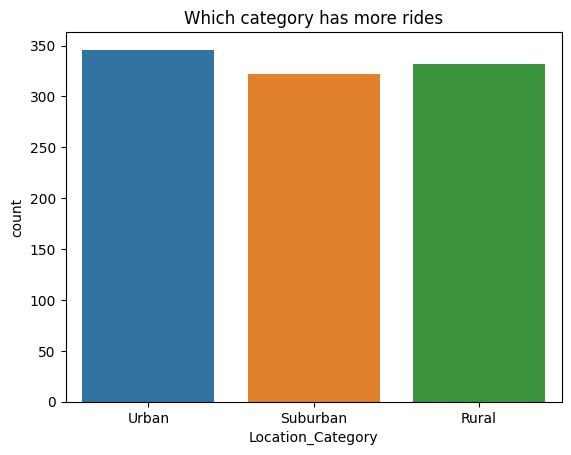

In [ ]:
sns.countplot(x='Location_Category',data=df)
df['Location_Category'].value_counts()
plt.title('Which category has more rides')
plt.show()

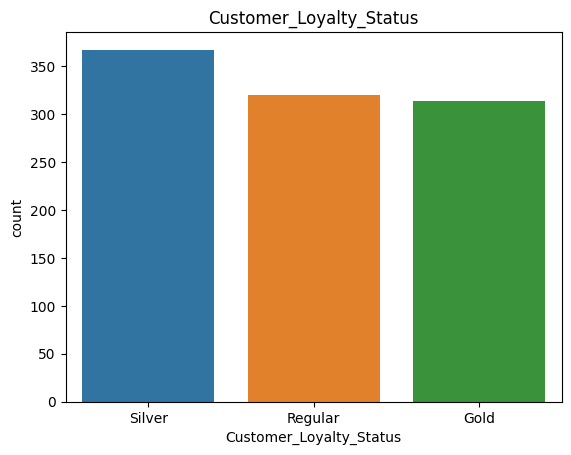

In [ ]:
sns.countplot(x='Customer_Loyalty_Status',data=df)
df['Customer_Loyalty_Status'].value_counts()
plt.title('Customer_Loyalty_Status')
plt.show()

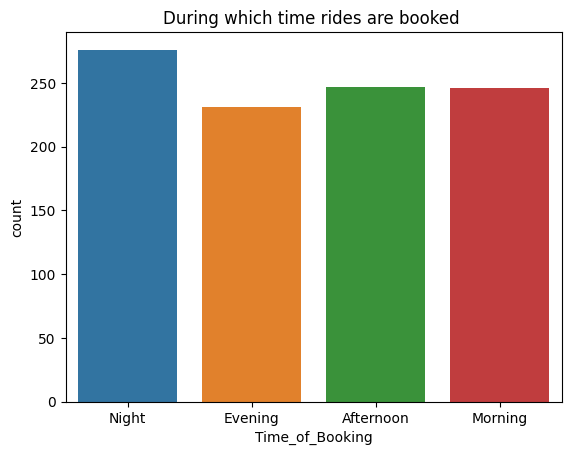

In [ ]:
sns.countplot(x='Time_of_Booking',data=df)
df['Time_of_Booking'].value_counts()
plt.title('During which time rides are booked ')
plt.show()

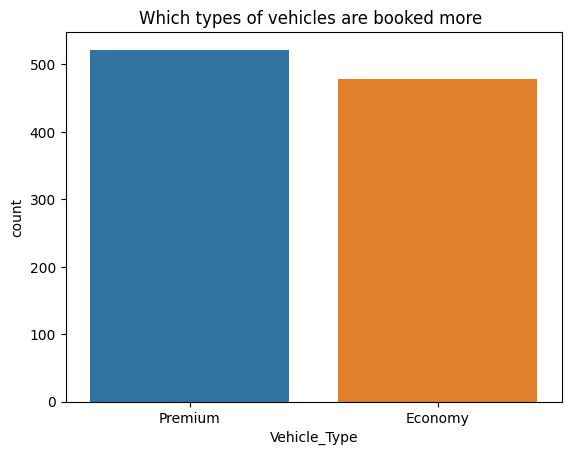

In [ ]:
sns.countplot(x='Vehicle_Type',data=df)
df['Vehicle_Type'].value_counts()
plt.title('Which types of vehicles are booked more ')
plt.show()

In [ ]:
import numpy as np

# Calculate demand_multiplier based on percentile for high and low demand
high_demand_percentile = 75
low_demand_percentile = 25

df['demand_multiplier'] = np.where(df['Number_of_Riders'] > np.percentile(df['Number_of_Riders'], high_demand_percentile),
                                     df['Number_of_Riders'] / np.percentile(df['Number_of_Riders'], high_demand_percentile),
                                     df['Number_of_Riders'] / np.percentile(df['Number_of_Riders'], low_demand_percentile))

# Calculate supply_multiplier based on percentile for high and low supply
high_supply_percentile = 75
low_supply_percentile = 25

df['supply_multiplier'] = np.where(df['Number_of_Drivers'] > np.percentile(df['Number_of_Drivers'], low_supply_percentile),
                                     np.percentile(df['Number_of_Drivers'], high_supply_percentile) / df['Number_of_Drivers'],
                                     np.percentile(df['Number_of_Drivers'], low_supply_percentile) / df['Number_of_Drivers'])

# Define price adjustment factors for high and low demand/supply
demand_threshold_high = 1.2  # Higher demand threshold
demand_threshold_low = 0.8  # Lower demand threshold
supply_threshold_high = 0.8  # Higher supply threshold
supply_threshold_low = 1.2  # Lower supply threshold

# Calculate adjusted_ride_cost for dynamic pricing
df['adjusted_ride_cost'] = df['Historical_Cost_of_Ride'] * (
    np.maximum(df['demand_multiplier'], demand_threshold_low) *
    np.maximum(df['supply_multiplier'], supply_threshold_high)
)

In [ ]:
# Calculate the profit percentage for each ride
df['profit_percentage'] = ((df['adjusted_ride_cost'] - df['Historical_Cost_of_Ride']) / df['Historical_Cost_of_Ride']) * 100
# Identify profitable rides where profit percentage is positive
profitable_rides = df[df['profit_percentage'] > 0]

# Identify loss rides where profit percentage is negative
loss_rides = df[df['profit_percentage'] < 0]

In [ ]:
df['profit_percentage'] = df['profit_percentage'].apply(lambda x: 'Profit' if x > 0 else 'Loss' if x < 0 else 'No Profit/Loss')


In [ ]:
df

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,demand_multiplier,supply_multiplier,adjusted_ride_cost,profit_percentage
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273,1.111111,0.844444,266.710528,Loss
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753,1.450000,0.974359,245.653817,Profit
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469,1.050000,1.225806,424.478684,Profit
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232,1.098765,1.357143,701.155452,Profit
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422,1.950000,1.727273,1952.472427,Profit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,33,23,Urban,Gold,24,4.21,Morning,Premium,11,91.389526,0.825000,1.652174,124.567897,Profit
996,84,29,Urban,Regular,92,4.55,Morning,Premium,94,424.155987,1.037037,1.310345,576.375440,Profit
997,44,6,Suburban,Gold,80,4.13,Night,Premium,40,157.364830,1.100000,1.833333,317.352408,Profit
998,53,27,Suburban,Regular,78,3.63,Night,Premium,58,279.095048,1.325000,1.407407,520.460581,Profit


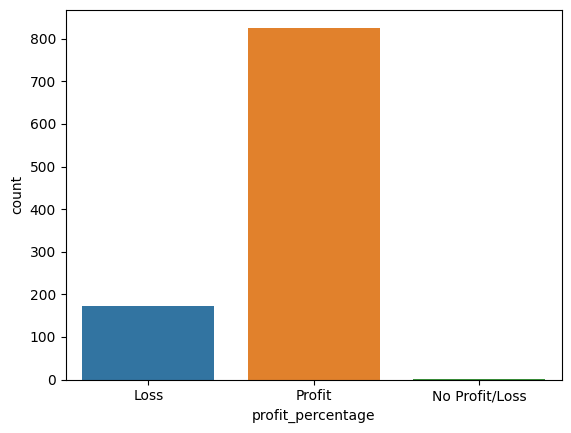

In [ ]:
sns.countplot(x='profit_percentage',data=df)
df['profit_percentage'].value_counts()
plt.show()

In [ ]:
df["Vehicle_Type"] = df["Vehicle_Type"].map({"Premium": 1, "Economy": 0})
df["Location_Category"] = df["Location_Category"].map({"Urban": 2, "Suburban": 1,'Rural':0})
df['Customer_Loyalty_Status']=df['Customer_Loyalty_Status'].map({'Regular':0,'Silver':1,'Gold':2})
df['Time_of_Booking']=df['Time_of_Booking'].map({'Morning':0,'Afternoon':1,'Evening':2,'Night':3})

In [ ]:
del df['demand_multiplier']
del df['supply_multiplier']
del df['profit_percentage']
del df['Historical_Cost_of_Ride']
df

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,adjusted_ride_cost
0,90,45,2,1,13,4.47,3,1,90,266.710528
1,58,39,1,1,72,4.06,2,0,43,245.653817
2,42,31,0,1,0,3.99,1,1,76,424.478684
3,89,28,0,0,67,4.31,1,1,134,701.155452
4,78,22,0,0,74,3.77,1,0,149,1952.472427
...,...,...,...,...,...,...,...,...,...,...
995,33,23,2,2,24,4.21,0,1,11,124.567897
996,84,29,2,0,92,4.55,0,1,94,576.375440
997,44,6,1,2,80,4.13,3,1,40,317.352408
998,53,27,1,0,78,3.63,3,1,58,520.460581


In [ ]:
from sklearn.model_selection import train_test_split
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(800, 9)
(800,)
(200, 9)
(200,)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [5, 10, None],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 5, 10],
}

# Create a Random Forest Regressor object
regressor = RandomForestRegressor()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5)

# Fit the grid search
grid_search.fit(x_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions
y_pred = best_model.predict(x_test)


In [ ]:
print(best_model)
print(best_params)

RandomForestRegressor(n_estimators=1000)
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_pred, y_test)
print('MSE:', mse)
print(mse**0.5)

MSE: 36341.77205204996
190.6351805204117


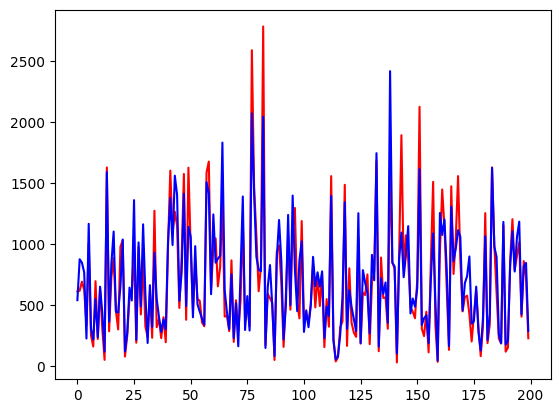

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_test,c='red')
plt.plot(y_pred,c='blue')
plt.show()

In [ ]:
a=input('Enter number of riders:')
b=input('Enter Number of Drivers:')
c=input('Enter Location Category (Rural=0,suburban =1,urban =2):')
d=input('Enter Customer Loyalty Status(Regular:0,Silver=1,Gold=2):')
e=input('Enter number of past rides:')
f=input('Enter average_ratings:')
g=input('Enter time of booking(Morning:0,Afternoon:1,Evening:2,Night:3):')
h=input('Enter Vehicle Type(Premium: 1, Economy: 0):')
i=input('Enter Expected Duration of Ride:')
features=np.array([[a,b,c,d,e,f,g,h,i]])
predicted_price = best_model.predict(features)
print('predicted price:',predicted_price)

Enter number of riders:50
Enter Number of Drivers:25
Enter Location Category (Rural=0,suburban =1,urban =2):2
Enter Customer Loyalty Status(Regular:0,Silver=1,Gold=2):2
Enter number of past rides:25
Enter average_ratings:4.9
Enter time of booking(Morning:0,Afternoon:1,Evening:2,Night:3):2
Enter Vehicle Type(Premium: 1, Economy: 0):0
Enter Expected Duration of Ride:30
predicted price: [286.45396827]
